In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import collections

from sklearn.utils import class_weight
from sklearn.metrics import average_precision_score, roc_auc_score, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# Proposed Model

In [4]:
PATH = './results/cnn/'

In [8]:
maxiter = 11
output = {}
for task in ['los_3', 'los_7', 'mort_hosp', 'mort_icu']:
    for it in range(1, maxiter):
        out = pd.read_pickle(PATH+f'GRU-256-word2vec-{task}-{it}-new-cnn-.p')
        output[task+'-'+str(it)] = out

In [15]:
out_df = pd.DataFrame(output).transpose().reset_index()

In [19]:
out_df['task'] = out_df['index'].str.split('-', expand=True)[0]
out_df['iter'] = out_df['index'].str.split('-', expand=True)[1]

In [28]:
out_df

,index,auc,auprc,acc,F1,task,iter
0,los_3-1,0.708674,0.646683,0.669683,0.563658,los_3,1
1,los_3-2,0.705940,0.644747,0.664706,0.560759,los_3,2
2,los_3-3,0.701400,0.641138,0.666516,0.558683,los_3,3
3,los_3-4,0.701185,0.639855,0.660633,0.557522,los_3,4
4,los_3-5,0.703507,0.641882,0.664253,0.570353,los_3,5
5,los_3-6,0.701702,0.640934,0.664253,0.531861,los_3,6
6,los_3-7,0.701886,0.641603,0.658597,0.526811,los_3,7
7,los_3-8,0.703777,0.641395,0.665385,0.585598,los_3,8
8,los_3-9,0.701320,0.642648,0.667873,0.540100,los_3,9
9,los_3-10,0.704081,0.646502,0.664932,0.556188,los_3,10


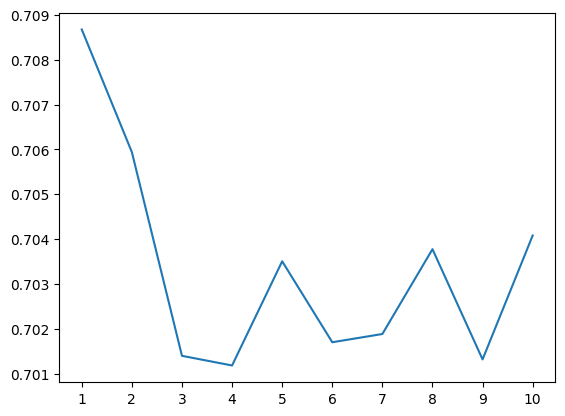

In [27]:
plt.plot('iter', 'auc', data=out_df[out_df['task']=='los_3'])

In [36]:
max_score = {}
for task in ['los_3', 'los_7', 'mort_hosp', 'mort_icu']:
    ind = out_df[out_df['task']==task]['auc'].argmax()
    score = out_df[out_df['task']==task].iloc[ind][['auc', 'auprc', 'acc', 'F1']].to_dict()
    max_score[task] = score

In [38]:
pd.DataFrame(max_score).transpose()

,auc,auprc,acc,F1
los_3,0.708674,0.646683,0.669683,0.563658
los_7,0.739701,0.229291,0.919910,0.027473
mort_hosp,0.887873,0.592722,0.918552,0.464286
mort_icu,0.891190,0.530186,0.943439,0.431818


In [39]:
pd.DataFrame(max_score).transpose().to_csv('proposed_best_score.csv')

# Baseline

In [45]:
PATH = './results/baseline/'

In [52]:
maxiter = 11
output = {}
for model in ['GRU', 'LSTM']:
    for size in [128, 256]:
        for task in ['los_3', 'los_7', 'mort_hosp', 'mort_icu']:
            for it in range(1, maxiter):
                out = pd.read_pickle(PATH+f'{size}-{model}-{task}-{it}-new.p')
                output['-'.join([str(size), model, task, str(it)])] = out

In [85]:
bl_outdf = pd.DataFrame(output).transpose()
bl_outdf = bl_outdf.reset_index()

In [89]:
bl_outdf['index'].str.split('-', expand=True)

,0,1,2,3
0,128,GRU,los_3,1
1,128,GRU,los_3,2
2,128,GRU,los_3,3
3,128,GRU,los_3,4
4,128,GRU,los_3,5
...,...,...,...,...
155,256,LSTM,mort_icu,6
156,256,LSTM,mort_icu,7
157,256,LSTM,mort_icu,8
158,256,LSTM,mort_icu,9


In [90]:
bl_outdf['hidden_unit'] = bl_outdf['index'].str.split('-', expand=True)[0]
bl_outdf['model'] = bl_outdf['index'].str.split('-',  expand=True)[1]
bl_outdf['task'] = bl_outdf['index'].str.split('-',  expand=True)[2]
bl_outdf['iter'] = bl_outdf['index'].str.split('-',  expand=True)[3]

In [91]:
bl_score = {}
for model in ['GRU', 'LSTM']:
        for task in ['los_3', 'los_7', 'mort_hosp', 'mort_icu']:
            sub_df = bl_outdf[(bl_outdf['model']==model) & (bl_outdf['task']==task)]
            ind = sub_df['auc'].argmax()
            bl_score['-'.join([model, task])] = sub_df.iloc[ind]

In [94]:
pd.DataFrame(bl_score).transpose().sort_values('task')

,index,auc,auprc,acc,F1,hidden_unit,model,task,iter
GRU-los_3,256-GRU-los_3-5,0.700732,0.642728,0.662443,0.561434,256,GRU,los_3,5
LSTM-los_3,256-LSTM-los_3-5,0.696965,0.638141,0.659502,0.548726,256,LSTM,los_3,5
GRU-los_7,128-GRU-los_7-6,0.746783,0.209726,0.916968,0.016086,128,GRU,los_7,6
LSTM-los_7,128-LSTM-los_7-1,0.738712,0.19897,0.917647,0.031915,128,LSTM,los_7,1
GRU-mort_hosp,128-GRU-mort_hosp-4,0.88458,0.567936,0.912896,0.395604,128,GRU,mort_hosp,4
LSTM-mort_hosp,128-LSTM-mort_hosp-1,0.879333,0.55456,0.912443,0.4,128,LSTM,mort_hosp,1
GRU-mort_icu,128-GRU-mort_icu-6,0.892192,0.539849,0.940045,0.442105,128,GRU,mort_icu,6
LSTM-mort_icu,128-LSTM-mort_icu-10,0.895832,0.521464,0.942308,0.388489,128,LSTM,mort_icu,10


In [95]:
pd.DataFrame(bl_score).transpose().sort_values('task').to_csv('baseline_best_score.csv')

# Baseline Average

In [96]:
PATH = './results/baseline_avg/'

In [98]:
maxiter = 11
output = {}

for size in [128, 256]:
    for task in ['los_3', 'los_7', 'mort_hosp', 'mort_icu']:
            out = pd.read_pickle(PATH+f'GRU-{size}-word2vec-{task}-1-new-avg-.p')
            output['-'.join([str(size), task])] = out

In [110]:
blavg_df = pd.DataFrame(output).transpose()

In [111]:
blavg_df = blavg_df.reset_index()

In [112]:
blavg_df

,index,auc,auprc,acc,F1
0,128-los_3,0.703051,0.641158,0.665385,0.562814
1,128-los_7,0.736769,0.231613,0.920362,0.043478
2,128-mort_hosp,0.886318,0.597724,0.919457,0.481050
3,128-mort_icu,0.894676,0.539072,0.945475,0.455982
4,256-los_3,0.705491,0.643840,0.662443,0.549517
5,256-los_7,0.730146,0.222715,0.919910,0.063492
6,256-mort_hosp,0.881349,0.587048,0.919231,0.480349
7,256-mort_icu,0.885233,0.531640,0.943891,0.465517


In [113]:
blavg_df['hidden_unit'] = blavg_df['index'].str.split('-', expand=True)[0]
blavg_df['task'] = blavg_df['index'].str.split('-', expand=True)[1]

In [114]:
blavg_df.head()

,index,auc,auprc,acc,F1,hidden_unit,task
0,128-los_3,0.703051,0.641158,0.665385,0.562814,128,los_3
1,128-los_7,0.736769,0.231613,0.920362,0.043478,128,los_7
2,128-mort_hosp,0.886318,0.597724,0.919457,0.481050,128,mort_hosp
3,128-mort_icu,0.894676,0.539072,0.945475,0.455982,128,mort_icu
4,256-los_3,0.705491,0.643840,0.662443,0.549517,256,los_3


In [116]:
blavg_score = {}
for task in ['los_3', 'los_7', 'mort_hosp', 'mort_icu']:
    sub_df = blavg_df[(blavg_df['task']==task)]
    ind = sub_df['auc'].argmax()
    blavg_score[task] = sub_df.iloc[ind]

In [117]:
pd.DataFrame(blavg_score).transpose()

,index,auc,auprc,acc,F1,hidden_unit,task
los_3,256-los_3,0.705491,0.64384,0.662443,0.549517,256,los_3
los_7,128-los_7,0.736769,0.231613,0.920362,0.043478,128,los_7
mort_hosp,128-mort_hosp,0.886318,0.597724,0.919457,0.48105,128,mort_hosp
mort_icu,128-mort_icu,0.894676,0.539072,0.945475,0.455982,128,mort_icu


In [118]:
pd.DataFrame(blavg_score).transpose().to_csv('baseline_avg_best_score.csv')